In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [3]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


0
0
0


In [5]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [6]:
# Summary statistics
print(customers.describe(include='all'))
print(products.describe(include='all'))
print(transactions.describe())


       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveW

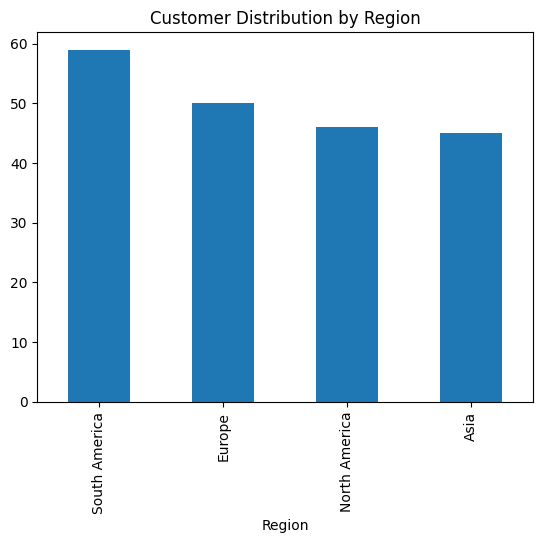

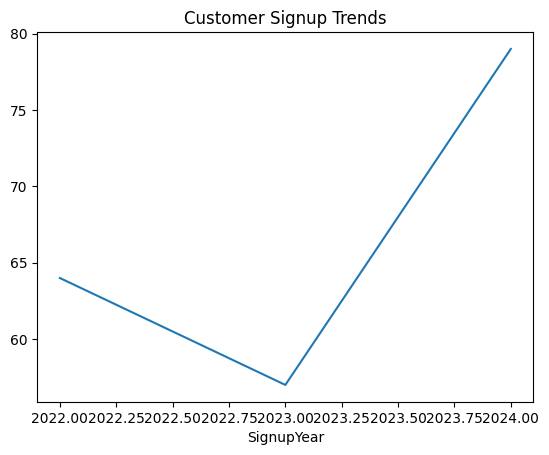

In [7]:
# Distribution of customers by region
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Distribution by Region')
plt.show()

# Signup trends
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
signup_trends.plot(kind='line', title='Customer Signup Trends')
plt.show()


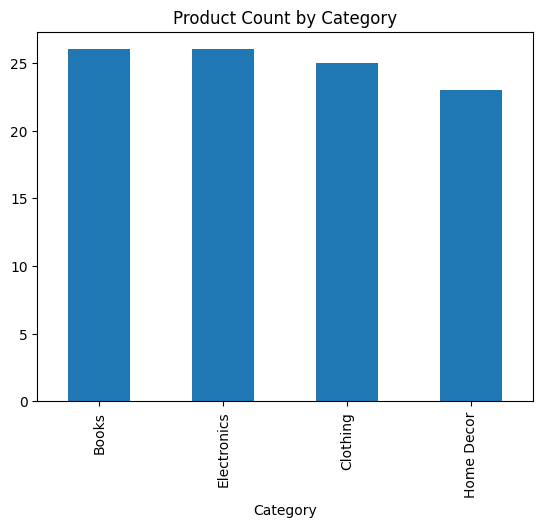

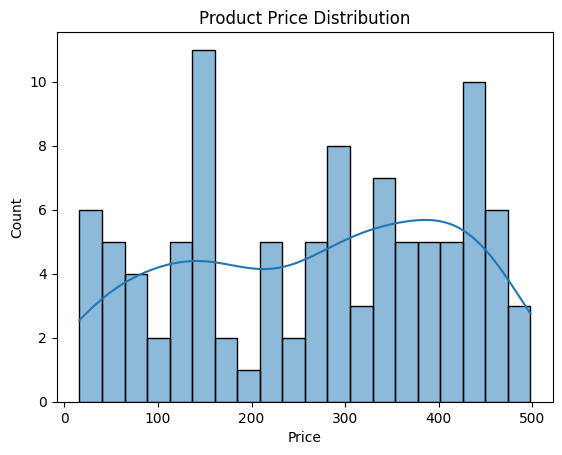

In [8]:
# Count of products by category
category_counts = products['Category'].value_counts()
category_counts.plot(kind='bar', title='Product Count by Category')
plt.show()

# Distribution of product prices
sns.histplot(products['Price'], kde=True, bins=20)
plt.title('Product Price Distribution')
plt.show()


Total Revenue: $689995.56
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


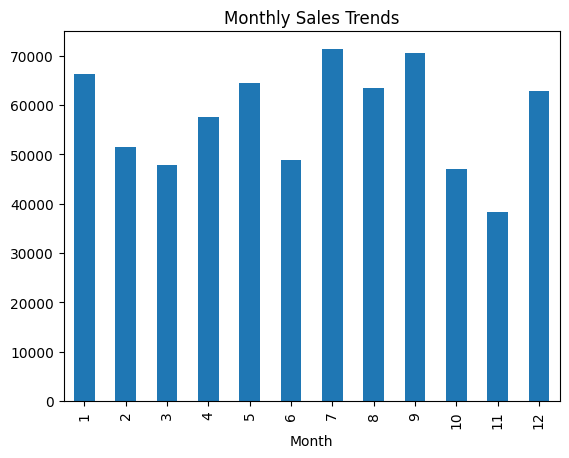

In [9]:
# Total revenue
total_revenue = transactions['TotalValue'].sum()
print(f'Total Revenue: ${total_revenue}')

# Top-selling products
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Seasonal trends
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales Trends')
plt.show()


In [10]:
# Merge transactions with products
merged_data = transactions.merge(products, on='ProductID')

# Merge with customers
merged_data = merged_data.merge(customers, on='CustomerID')

print(merged_data.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x  Month                      ProductName     Category  \
0      300.68   300.68      8  ComfortLiving Bluetooth Speaker  Electronics   
1      300.68   300.68      5  ComfortLiving Bluetooth Speaker  Electronics   
2      300.68   300.68      4  ComfortLiving Bluetooth Speaker  Electronics   
3      601.36   300.68      3  ComfortLiving Bluetooth Speaker  Electronics   
4      902.04   300.68      3  ComfortLiving Bluetooth Speaker  Electronics   

   Price_y     CustomerName         Region SignupDate  SignupYear  
0   300.68   Andrea Jenkins         

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64
Average Transaction Value: $690.00


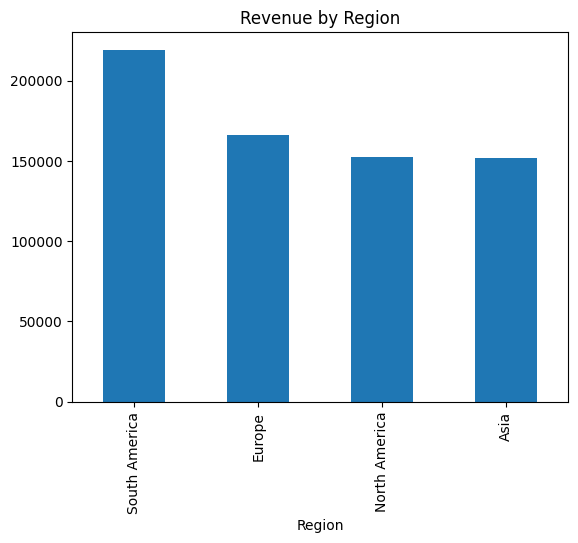

In [11]:
# Total spending by customer
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(customer_spending.head())

# Average transaction value
avg_transaction_value = merged_data['TotalValue'].mean()
print(f'Average Transaction Value: ${avg_transaction_value:.2f}')

# Most active regions
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_revenue.plot(kind='bar', title='Revenue by Region')
plt.show()


In [12]:

merged_data.to_csv('Merged_Data.csv', index=False)

